# Crop digit (0-9) from image

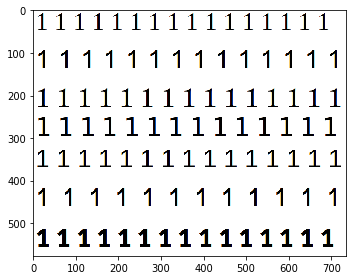

('Number of Dimension', 3)


In [26]:
# read image file
from skimage import io

digit = io.imread("image/digit-1.png")
io.imshow(digit)
io.show()

print("Number of Dimension", digit.ndim)

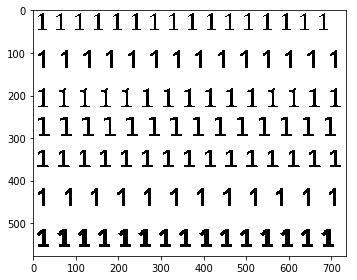

('Number of Dimension', 2)


In [27]:
# convert image to binary image
from skimage import filters, color

gray_image = color.rgb2gray(digit)
thresh = filters.threshold_mean(gray_image)
binary_image = gray_image > thresh

io.imshow(binary_image)
io.show()

print("Number of Dimension", binary_image.ndim)

## Finding an object (digit) from image

('number of objects', 101)


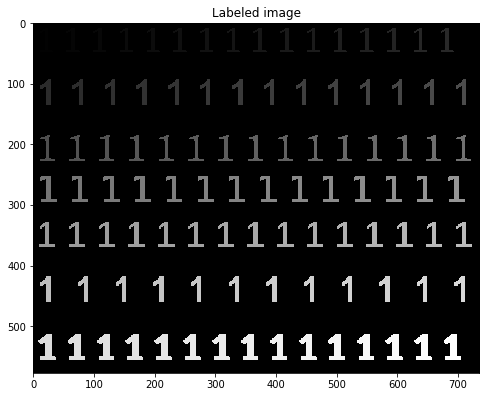

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

label_objects, nb_labels = ndi.label(np.invert(binary_image))
print("number of objects", nb_labels)

plt.subplots(ncols=1, nrows=1, figsize=(8, 8))
plt.imshow(label_objects, cmap=plt.cm.gray)
plt.title("Labeled image")
plt.show()

## Show crop image 

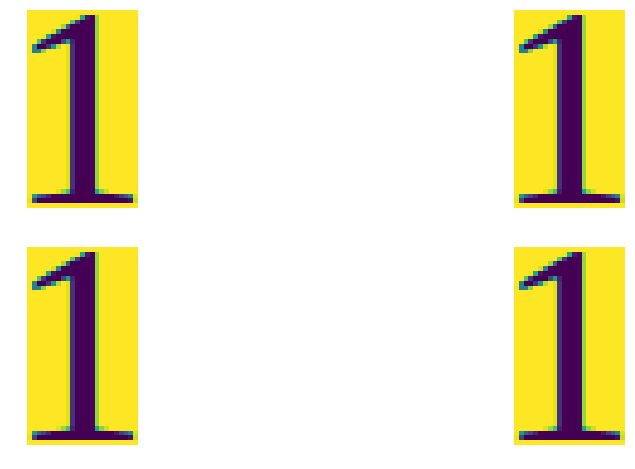

In [29]:
from skimage import transform
import numpy as np

# define size of the digit
img_row = 28
img_col = 28
# define class of the digit
img_class = 1

#show crop image
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16,8))
rows = 2
cols = 2
cnt = 1
for i in(range(0, rows)):
    for j in(range(0, cols)):
        tmp = label_objects == cnt            
        r, = np.where(tmp.sum(axis=1) > 1)
        c, = np.where(tmp.sum(axis=0) > 1)

        # crop with border
        tmp_img = gray_image[(r.min()-1):(r.max()+2), (c.min()-1):(c.max()+2)]
        digit_x = transform.resize(tmp_img, (img_row,img_col), mode='reflect')
        #digit_x = digit_x.reshape((1,(img_row*img_col)))
        #tmp_digit_data = np.hstack((digit_y, digit_x[0,:]))
        #digit_fv = np.vstack((digit_fv, tmp_digit_data))

        axes[i,j].imshow(tmp_img) 
        axes[i,j].set_axis_off()
                        
        cnt = cnt+1       
        
plt.show()

## Create feature vector

In [33]:
#create feature vector
digit_x = np.zeros((1,(img_row*img_col)), dtype='float64')
digit_y = 1
digit_fv = np.zeros((1,(img_row*img_col)+1), dtype='float64')

for i in(range(1,nb_labels)):
    tmp = label_objects == i
    r, = np.where(tmp.sum(axis=1) > 1)
    c, = np.where(tmp.sum(axis=0) > 1)

    # crop with border
    tmp_img = gray_image[(r.min()-1):(r.max()+2), (c.min()-1):(c.max()+2)]
    digit_x = transform.resize(tmp_img, (img_row,img_col), mode='reflect')
    digit_x = digit_x.reshape((1,(img_row*img_col)))
    tmp_digit_data = np.hstack((digit_y, digit_x[0,:]))
    digit_fv = np.vstack((digit_fv, tmp_digit_data))

# remove first row
digit_fv = np.delete(digit_fv, 0, 0)
print("Class number ", digit_y)
print("number of features ", len(digit_fv[0,1:]))
print("number of instances ", digit_fv.shape[0])

#save file
output_filename = 'digit_fv.train'
f_handle = open(output_filename,'a')
np.savetxt(f_handle, digit_fv, fmt='%.6f')
f_handle.close()

('Class number ', 1)
('number of features ', 784)
('number of instances ', 100)


In [23]:
# show feature vector 
digit_fv[0:10,0:]

array([[ 1.        ,  1.        ,  1.        , ...,  0.77281806,
         0.8322791 ,  0.96022193],
       [ 1.        ,  1.        ,  1.        , ...,  0.77281806,
         0.8322791 ,  0.96022193],
       [ 1.        ,  1.        ,  1.        , ...,  0.77281806,
         0.8322791 ,  0.96022193],
       ..., 
       [ 1.        ,  1.        ,  1.        , ...,  0.77281806,
         0.8322791 ,  0.96022193],
       [ 1.        ,  1.        ,  1.        , ...,  0.77281806,
         0.8322791 ,  0.96022193],
       [ 1.        ,  1.        ,  1.        , ...,  0.77281806,
         0.8322791 ,  0.96022193]])

# Load data text file
using numpy to load data from text file

In [24]:
import numpy as np

# Be careful of the data type when load text file
int_data = np.loadtxt(output_filename, dtype='uint8')

print("shape", int_data.shape)
print("Data type - uint8")
print int_data[0:10,0:]

('shape', (200, 785))
Data type - uint8
[[1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]]


In [25]:
import numpy as np

float_data = np.loadtxt(output_filename, dtype='float64')

print("shape", float_data.shape)
print("Data type - float64")
print float_data[0:10,0:]

('shape', (200, 785))
Data type - float64
[[ 1.        1.        1.       ...,  0.772818  0.832279  0.960222]
 [ 1.        1.        1.       ...,  0.772818  0.832279  0.960222]
 [ 1.        1.        1.       ...,  0.772818  0.832279  0.960222]
 ..., 
 [ 1.        1.        1.       ...,  0.772818  0.832279  0.960222]
 [ 1.        1.        1.       ...,  0.772818  0.832279  0.960222]
 [ 1.        1.        1.       ...,  0.772818  0.832279  0.960222]]
